<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tqdm import tqdm

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.25)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


### Let's try for Linear Kernel

In [3]:
from sklearn.svm import LinearSVC

linear_clf = LinearSVC()
linear_clf.fit(X_train, y_train)

LinearSVC()

In [4]:
intercept = linear_clf.intercept_[0]
decision_func_op = []
for i in range(len(X_cv)):
    prod = np.dot(X_cv[i], linear_clf.coef_[0]) + intercept
    decision_func_op.append(prod)


In [5]:
np.array(decision_func_op)[0:5]

array([-1.95589967, -0.45234883, -0.99194438, -1.77921754, -1.75518297])

In [6]:
linear_clf.decision_function(X_cv)[0:5]

array([-1.95589967, -0.45234883, -0.99194438, -1.77921754, -1.75518297])

So the values of the implemented function matches with the model output.

### FOR RBF KERNEL

In [7]:
#For RBF Kernel
from numpy import linalg  

clf = SVC(gamma=0.001, C=100, kernel='rbf')
clf.fit(X_train, y_train)

#Support Vectors
Xi = clf.support_vectors_
#Xi = clf.support_vectors_.tolist()

#Query Point
Xq = X_cv
#Xq = X_cv.tolist()

In [8]:
def decision_func(data, support_vectors, clf, gamma = 0.001 ):
    
    aiyi = clf.dual_coef_.tolist()
    intercept = clf.intercept_[0]
    decision_function_outputs = []
    
    #Selecting Query points
    for query_point in data:
        
        interim_sum = 0
        
        #Selecting Each Support Vector
        for i in range(len(support_vectors)):
            dist = query_point - support_vectors[i]
            l2_norm = linalg.norm(dist,2)
            interim_val = math.exp(-gamma * math.pow(l2_norm,2))
            interim_sum += aiyi[0][i] * interim_val
        final_val = np.round((interim_sum + intercept),8)
        decision_function_outputs.append(final_val)
        
    return np.array(decision_function_outputs)

In [9]:
decision_function_output = decision_func(X_cv, Xi, clf)
decision_function_output[0:5]

array([-3.81806864, -0.82940814, -1.71344976, -3.18419185, -3.11733783])

In [10]:
clf.decision_function(X_cv)[0:5]

array([-3.81806864, -0.82940814, -1.71344976, -3.18419185, -3.11733783])

_________

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


**Here first task is to find y+ and y-**

In [11]:
targets = y_train.tolist()
targets.count(0), targets.count(1)

(2106, 894)

In [12]:
 #calculate y+, y-
N_plus = targets.count(1)
y_pos = (N_plus + 1) / (N_plus + 2)

N_minus = targets.count(0)
y_neg = 1 / (N_minus + 2)

In [13]:
y_pos, y_neg

(0.9988839285714286, 0.0004743833017077799)

In [14]:
y_modified = [y_pos if i == 1 else y_neg for i in y_train]
y_modified = np.array(y_modified)
y_modified[0:5]


array([9.98883929e-01, 4.74383302e-04, 4.74383302e-04, 9.98883929e-01,
       9.98883929e-01])

First need to modify **Sigmoid and Loss Function**

Here use manual implementation of SGD code from previous assignmemnt

In [15]:
def logloss(y_modified,y_pred):
    '''In this function, we will compute log loss '''
    sub_sum = 0

    for i in range(len(y_modified)):
        sub_x = y_modified[i]*(np.log10(y_pred[i])) + (1 - y_modified[i])*(np.log10(1-y_pred[i]))
        sub_sum += sub_x
    loss = -(sub_sum)/len(y_true)

    return loss

In [52]:
epochs=50
alpha=0.0001
eta0=0.0001
tolerace = 0.00001

#from tqdm import tqdm

def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    
    w = np.zeros_like(dim)
    b = 0

    return w,b

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid = 1 / (1 + np.exp(-z))

    return sigmoid

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sub_sum = 0

    for i in range(len(y_true)):
        sub_x = y_true[i]*(np.log10(y_pred[i])) + (1 - y_true[i])*(np.log10(1-y_pred[i]))
        sub_sum += sub_x
    loss = -(sub_sum)/len(y_true)

    return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    dw = x*(y - sigmoid(np.dot(w, x+b))) - (alpha*w)/N
    

    return dw

def gradient_db(x,y,w,b):
    
    '''In this function, we will compute gradient w.r.to b '''

    db = y - sigmoid(np.dot(w, x+b))

    return db




In [53]:
def train(X_train, y_train ,X_test, y_test, epochs ,alpha, eta0, tolerace):
    
    ''' In this function, we will implement logistic regression'''

    N=len(X_train)

    w, b = initialize_weights(X_train[0])
    training_loss = []
    test_loss = []
    
    converged = False
    
    while not converged :
        for every_epoch in tqdm(range(epochs)):

            y_predicted_train = []
            y_predicted_test = []

            for i in range(len(X_train)):
                grad_w = gradient_dw(X_train[i], y_train[i], w, b, alpha, N)
                grad_B = gradient_db(X_train[i], y_train[i], w, b)

                #Updating weights and intercept
                w = w + eta0 * grad_w
                b = b + eta0 * grad_B


            for i in range(len(X_train)):
                y_pred_train = sigmoid(np.dot(w,X_train[i])+b) #changed here, using sigmoid
                y_predicted_train.append(y_pred_train)

            loss_train = logloss(list(y_train), y_predicted_train)
            training_loss.append(loss_train)

            #predicting y_test with updated values of w and b
            for i in range(len(X_test)):
                y_pred_test = sigmoid(np.dot(w,X_test[i])+b)
                y_predicted_test.append(y_pred_test)

            loss_test = logloss(y_test, y_predicted_test)
            test_loss.append(loss_test)

            if every_epoch != 0 and (training_loss[every_epoch-1] - training_loss[every_epoch]) <= tolerace:
                max_epoch = every_epoch
                converged = True
                print("Converged at {0} th epoch with tolerance = {1} ".format(every_epoch, tolerace))
                break
 
    return w,b,training_loss,test_loss, y_predicted_train, max_epoch
    
    
    

In [54]:
fcv = decision_func(X_cv, Xi, clf)
y_cv_modified = [y_pos if i == 1 else y_neg for i in y_cv]
y_cv_modified = np.array(y_cv_modified)


ftest = decision_func(X_test, Xi, clf)
y_test_modified = [y_pos if i == 1 else y_neg for i in y_test]
y_test_modified = np.array(y_test_modified)

In [55]:
epochs=50
alpha=0.0001
eta0=0.0001
tolerace = 0.001
w,b,training_loss,test_loss, y_predicted_train, max_epoch  = train(fcv, y_cv_modified, ftest, y_test_modified,epochs,alpha,eta0, tolerace)

 48%|███████████████████████████████████████▎                                          | 24/50 [00:01<00:01, 17.87it/s]

Converged at 24 th epoch with tolerance = 0.001 


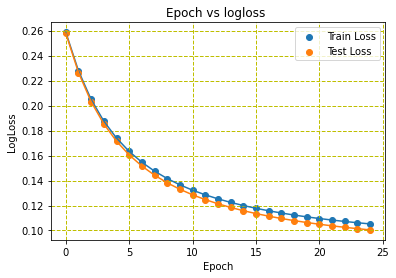

In [56]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(max_epoch+1)], training_loss)
plt.scatter([i for i in range(max_epoch+1)], training_loss,label='Train Loss')

plt.plot([i for i in range(max_epoch+1)], test_loss)
plt.scatter([i for i in range(max_epoch+1)], test_loss, label='Test Loss')
plt.grid(color='y', linestyle='--', linewidth=1)
plt.title("Epoch vs logloss ")
plt.xlabel("Epoch")
plt.ylabel("LogLoss")
plt.legend()
plt.show()

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

Now that we have value of w and b, write a function to compute probabilities.

In [59]:
platts_prob = []
for i in range(len(X_test)):
    prob = np.round(1/(1+math.exp(w*fcv[i]+b)),5)
    platts_prob.append(prob)

In [60]:
platts_prob[0:10]

[0.97192,
 0.7029,
 0.83954,
 0.95144,
 0.94859,
 0.19154,
 0.90673,
 0.88302,
 0.42632,
 0.15079]

_________